# Yum, That Dish Tests Good

## To the lab for testing

### 2. A/B testing

* In 2013, Electronic Arts, or EA, launched a video game called SimCity 5.
* Leading up to its release, they wanted to increase pre-order sales.
* They used an experimental design technique called A/B testing, which has roots in hypothesis testing, to test different advertising scenarios and see which improved sales the most.
* Website visitors were split into a control group and a treatment group. Each group saw a different version of the game's pre-order sales page.

### 3. Retail webpage A/B test

Here's each version of the SimCity 5 pre-order page. The control group saw the version with a banner advertising money off their next purchase with each pre-order. The treatment group saw the version without the banner. EA compared the percentage of checkouts for the two groups to see which performed best. Our naive guess would be that the advertisement increased pre-order sales.
<br><img src="image/img.png">

### 4. A/B test results

The results of the A/B test were surprising.
1. The treatment page without the advertisement resulted in 43 percent higher sales than the control page with the advert.
2. The experiment proved that our intuition that more discount adverts would result in more sales was false.
3. We might ask ourselves, was the 43 percent difference a meaningful difference between the control and treatment groups, or was it just random chance?
4. To get this answer, we'd need the original dataset from EA, which isn't publicly available. However, the method to answering this question of significance would involve techniques from both the Sampling in Python course and from this course.

#### What is main reason to use the an A/B test?
1. It provides a way to check outcomes of competing scenarios and decide which way to proceed.
2.  A/B testing lets you compare scenarios to see which best achieves some goal.

### 5. Stack Overflow Developer Survey 2020

Each year, Stack Overflow surveys its users, who are primarily software developers, about themselves, how they use Stack Overflow, their work, and the development tools they use. In this course, we'll look at a subset of the survey responses from users who identified as Data Scientists.

In [1]:
import pandas as pd
import numpy as np
stack_overflow = pd.read_feather("data/stack_overflow.feather")
stack_overflow.shape

(2261, 63)

### 6. Hypothesizing about the mean

1. Let's hypothesize that the **mean annual compensation of the population of data scientists is 110,000 dollars.**
2. We can initially examine the mean annual compensation from the sample survey data. Annual compensation, converted to dollars, is stored in the converted_comp column.
3. The sample mean is a type of point estimate, which is another name for a summary statistic.
4. We can calculate it with pandas using the dot-mean method on the converted_comp Series. The result is different from our hypothesis, but is it meaningfully different?

In [2]:
mean_comp_samp = stack_overflow["converted_comp"].mean()
mean_comp_samp

119574.71738168952

### 7. Generating a bootstrap distribution

To answer this, we need to generate a bootstrap distribution of sample means. This is done by resampling the dataset, calculating the sample mean for that resample, then repeating those steps to create a list of sample means.

In [3]:
so_mean_boot_dist = []
for i in range(5000):
    so_mean_boot_dist.append(stack_overflow.sample(frac=1,replace=True)["converted_comp"].mean())



### 8. Visualizing the bootstrap distribution

Here's a histogram of the bootstrap distribution. Its bell shape means that it's roughly normally distributed. Notice that 110,000 is on the left of the distribution.

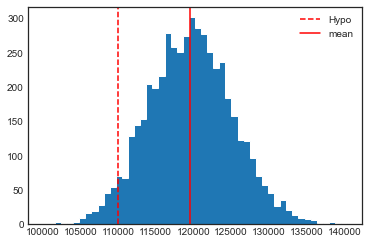

In [4]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

plt.hist(so_mean_boot_dist,bins=50,histtype="stepfilled")
plt.axvline(x=110000,c="red",ls="--",label="Hypo")
plt.axvline(x=np.mean(so_mean_boot_dist),c="red",label="mean")
plt.legend()
plt.show()

### 9. Standard error

Recall that the standard deviation of the sample statistics in the bootstrap distribution estimates the standard error of the statistic.

In [5]:
std_error = np.std(so_mean_boot_dist,ddof=1)
std_error

5591.558507764559

### 10. z-scores

Since variables have arbitrary units and ranges, before we test our hypothesis, we need to standardize the values. A common way of standardizing values is to subtract the mean, and divide by the standard deviation. For hypothesis testing, we use a variation where we take the sample statistic, subtract the hypothesized parameter value, and divide by the standard error. The result is called a z-score.

$$\mbox{standardized value} = \frac {\mbox{value - mean}}{\mbox{standard deviation}}$$

For Hypothesis:

$$\mbox{z value} = \frac {\mbox{sample statistic - hypothesized paramenter value}}{\mbox{standard error}}$$

### 11. z-scores

Here are the values we calculated earlier. The sample mean annual compensation for data scientists of around 120,000 dollars, minus the hypothesized compensation of 110,000, divided by the standard error gives a z-score of one-point-seven-zero-seven.

In [6]:
mean_comp_hypo = 110000

z_score = (mean_comp_samp - mean_comp_hypo) / std_error
z_score

1.7123521766594882

### 12. Testing the hypothesis

Is that a big or small number? Determining that is the goal of this course.

### 13. Testing the hypothesis

In particular, we can now state one of the uses of hypothesis testing: determining whether a sample statistic is close to or far away from an expected value.

### 14. Standard normal (z) distribution

One final thing. Here's a plot of the probability density function for the standard normal distribution, which is a normal distribution with mean of zero and standard deviation of one. It's often called the z-distribution, and z-scores are related to this distribution. We'll encounter the z-distribution throughout this course.

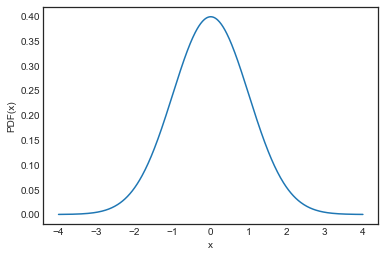

In [7]:
from scipy.stats import norm
xs = np.linspace(start=-4,stop=4,num=500)
pdf = norm.pdf(xs)
plt.plot(xs,pdf)
plt.xlabel("x")
plt.ylabel("PDF(x)")
plt.show()

### 15. Let's practice!

Time to begin!

## Calculating the sample mean

<p>The <code>late_shipments</code> dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The <code>late</code> columns denotes whether or not the part was delivered late. A value of <code>"Yes"</code> means that the part was delivered late, and a value of <code>"No"</code> means the part was delivered on time.</p>
<p>Let's begin our analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.</p>
<p><code>late_shipments</code> is available, and <code>pandas</code> is loaded as <code>pd</code>.</p>

In [8]:
late_shipments = pd.read_feather("data/late_shipments.feather")
late_shipments

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13608.0,Uganda,PMO - US,Direct Drop,DDP,Air,0.0,No,ARV,Adult,...,121.0,9075.00,75.00,0.62,"Janssen-Cilag, Latina, IT",Yes,43.0,199.00,reasonable,12.72
996,80394.0,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,292.0,9344.00,32.00,1.60,"Trinity Biotech, Plc",Yes,99.0,2162.55,reasonable,13.10
997,61675.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2127.0,170160.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,881.0,14019.38,expensive,210.49
998,39182.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,191011.0,861459.61,4.51,0.15,"Aurobindo Unit III, India",Yes,16234.0,14439.17,expensive,1421.41


In [9]:
# Calculate the proporation of the late shipments
late_prop_samp = late_shipments["late"].value_counts(normalize=True)
late_prop_samp

No     0.939
Yes    0.061
Name: late, dtype: float64

## Calculating a z-score

<p>Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.</p>
<p>One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).</p>
<p>The sample statistic is available as <code>late_prop_samp</code>.</p>
<p><code>late_shipments_boot_distn</code> is a bootstrap distribution of the proportion of late shipments, available as a list.</p>
<p><code>pandas</code> and <code>numpy</code> are loaded with their usual aliases.</p>

In [10]:
late_shipments_boot_dist =[]
for i in range(5000):
    late_shipments_boot_dist.append(
        late_shipments.sample(frac=1,replace=True)["late_delivery"].mean()
    )

Hypothesize that the proportion of late shipments is 6%.

In [11]:
late_prop_hyp = .06
late_prop_samp = late_prop_samp[1]
late_prop_samp

0.061

Calculate the standard error from the standard deviation of the bootstrap distribution.

In [12]:
std_error = np.std(late_shipments_boot_dist,ddof=1)


Calculate the z-score.

In [13]:
z_score = (late_prop_samp - late_prop_hyp)/std_error
z_score

0.13274452896408367

## A tail of two z's

### 1. A tail of two z's

Hypothesis tests are like criminal trials.

### 2. Criminal trials

1. There are two possible true states:
      1. the defendant either committed the crime,
      2. or didn't.
2. There are also two possible outcomes:
      1. a guilty or not guilty verdict.
3. The initial assumption is that the defendant is not guilty, and
4. the prosecution team must present evidence beyond a reasonable doubt that the defendant committed the crime for a guilty verdict to be given.

### 3. Age of first programming experience

Let's return to the Stack Overflow survey.<br>



* The age_first_code_cut variable classifies when the user began programming.
    1. If they were 14 or older, they are classified as adult;
    2. otherwise, child.
* Suppose previous research suggests that 35 percent of software developers programmed as children. This raises a question answerable with our dataset.
* Does our sample provide evidence that a greater proportion of data scientists started programming as children?

### 4. Definitions

Let's specify some definitions. A hypothesis is a statement about a population parameter. We don't know the true value of this population parameter; we can only make inferences about it from the data. Hypothesis tests compare two competing hypotheses. These two hypotheses are the null hypothesis, representing the existing idea, and the alternative hypothesis, representing a new idea that challenges the existing one. They are denoted H-naught and H-A, respectively. Here, the null hypothesis is that the proportion of data scientists that started programming as children follows the research on software developers, at 35 percent. The alternative hypothesis is that the percentage is greater than 35.
<br>
<img src="image/img_1.png">

### 5. Criminal trials vs. hypothesis testing

Returning to our criminal trial comparison, the defendant can be either guilty or not guilty, and likewise, only one of the hypotheses can be true. Initially, the defendant is assumed to be not guilty and, similarly, we initially assume that the null hypothesis is true. This only changes if the sample provides enough evidence to reject it. Rather than saying we accept the alternative hypothesis, it is convention to refer to rejecting the null hypothesis, or failing to reject the null hypothesis. If the evidence is "beyond a reasonable doubt" that the defendant committed the crime, then a "guilty" verdict is given. The hypothesis testing equivalent of "beyond a reasonable doubt" is known as the significance level - more on this later in the chapter.
<br>
<img src="image/img_2.png">

### 6. One-tailed and two-tailed tests

The tails of a distribution are the left and right edges of its PDF. Hypothesis tests determine whether the sample statistics lie in the tails of the null distribution, which is the distribution of the statistic if the null hypothesis was true. There are three types of tests, and the phrasing of the alternative hypothesis determines which type we should use. If we are checking for a difference compared to a hypothesized value, we look for extreme values in either tail and perform a two-tailed test. If the alternative hypothesis uses language like "less" or "fewer", we perform a left-tailed test. Words like "greater" or "exceeds" correspond to a right-tailed test. For the Stack Overflow hypothesis test, we need a right-tailed test since we are looking for extreme values in the right tail.
<br>
<img src="image/img_3.png">

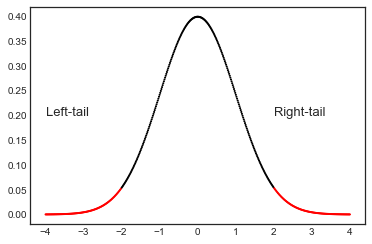

In [14]:
tail = ["r" if (abs(x)>2) else "k" for x in xs]
plt.scatter(xs,pdf,c=tail,s=1)
plt.text(x=-4,y=0.2,s="Left-tail",fontdict={"size":13})
plt.text(x=2,y=0.2,s="Right-tail",fontdict={"size":13})
plt.show()

### 7. p-values

1. p-values measure the strength of support for the null hypothesis, or in other words, they measure the probability of obtaining a result, assuming the null hypothesis is true.
2. Large p-values mean our statistic is producing a result that is likely not in a tail of our null distribution, and chance could be a good explanation for the result.
3. Small p-values mean our statistic is producing a result likely in the tail of our null distribution. Because p-values are probabilities, they are always between zero and one.

In [15]:
normal = pd.DataFrame({"x":xs,
                       "pdf":pdf})

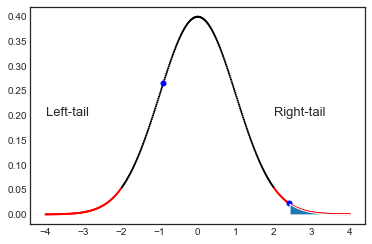

In [16]:
tail = ["r" if (abs(x)>2) else "k" for x in xs]
plt.scatter(xs,pdf,c=tail,s=1)
plt.scatter(2.4,norm.pdf(2.4),c="b",s=25)
plt.scatter(-.9,norm.pdf(-.9),c="b",s=25)
plt.fill_between(normal[normal["x"]>2.4]["x"],normal[normal["x"]>2.4]["pdf"],facecolor=None)

plt.text(x=-4,y=0.2,s="Left-tail",fontdict={"size":13})
plt.text(x=2,y=0.2,s="Right-tail",fontdict={"size":13})
plt.show()

### 8. Calculating the z-score

To calculate the p-value, we must first calculate the z-score. We calculate the sample statistic, in this case the proportion of data scientists who started programming as children. The hypothesized value from the null hypothesis is 35 percent. We get the standard error from the standard deviation of the bootstrap distribution, and the z-score is the difference between the proportions, divided by the standard error.

In [17]:
prop_child_samp = (stack_overflow["age_first_code_cut"] == "child").mean()
prop_child_samp

0.39141972578505085

In [18]:
prop_child_hyp = .35


In [19]:
first_code_boot_dist =[]
for i in range(5000):
    first_code_boot_dist.append(
        (stack_overflow.sample(frac=1,replace=True)["age_first_code_cut"] =="child").mean()
    )
std_error = np.std(first_code_boot_dist,ddof=1)

In [20]:
z_score = (prop_child_samp -prop_child_hyp)/std_error
z_score

4.082410552448322

### 9. Calculating the p-value

We pass the z-score to the standard normal CDF, norm-dot-cdf, from scipy-dot-stats with the default values of mean zero and standard deviation of one. As we're performing a right-tail test, not a left-tail test, the p-value is calculated by taking one minus the norm-dot-cdf result. The p-value is three out of 100,000.

In [21]:
1 - norm.cdf(z_score,loc=0,scale=1)

2.2285484434947378e-05

### 10. Let's practice!

Go calculate some p-values!

## Calculating p-values

<p>In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.</p>
<p>You'll now return to the late shipments dataset and the proportion of late shipments.</p>
<p>The null hypothesis, <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="2" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-texatom size="s" texclass="ORD"><mjx-mn class="mjx-n"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mn>0</mn></mrow></msub></math></mjx-assistive-mml></mjx-container>, is that the proportion of late shipments is six percent.</p>
<p>The alternative hypothesis, <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="3" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.153em;"><mjx-texatom size="s" texclass="ORD"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D434 TEX-I"></mjx-c></mjx-mi></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mi>A</mi></mrow></msub></math></mjx-assistive-mml></mjx-container>, is that the proportion of late shipments is <strong>greater than</strong> six percent.</p>
<p>The observed sample statistic, <code>late_prop_samp</code>, the hypothesized value, <code>late_prop_hyp</code> (6%), and the bootstrap standard error, <code>std_error</code> are available. <code>norm</code> from <code>scipy.stats</code> has also been loaded without an alias.</p>

$$H_{0}: \mu = 6 % $$
$$H_{0}: \mu \gt 6 % $$

In [22]:
std_error = np.std(late_shipments_boot_dist,ddof=1)
z_score = (late_prop_samp - late_prop_hyp)/std_error

p_value = 1 - norm.cdf(z_score,loc=0,scale=1)
p_value

0.4471977127217758

## Statistically significant other

### 1. Statistically significant other

Last time, we introduced p-values.

### 2. p-value recap

1. p-values quantify how much evidence there is for the null hypothesis.
2. Large p-values indicate a lack of evidence for the alternative hypothesis, sticking with the assumed null hypothesis instead.
3. Small p-values make us doubt this original assumption in favor of the alternative hypothesis.
4. What defines the cutoff point between a small p-value and a large one?

### 3. Significance level

**The cutoff point is known as the significance level, and is denoted alpha.** The appropriate significance level depends on the dataset and the discipline worked in. Five percent is the most common choice, but ten percent and one percent are also popular. The significance level gives us a decision process for which hypothesis to support.
1. If the p-value is less than or equal to alpha, we reject the null hypothesis.
2. Otherwise, we fail to reject it.
3. It's important that we decide what the appropriate significance level should be before we run our test. Otherwise, there is a temptation to decide on a significance level that lets us choose the hypothesis we want.

### 4. Calculating the p-value

The workflow starts with setting the significance level, in this case point-zero-five. Next, we calculate the sample mean and assign the hypothesized mean. For the z-score, we also need the standard error, which we obtain from the bootstrap distribution. Then we calculate the z-score using the sample mean, hypothesized mean, and standard error, and use the standard normal CDF to get the p-value.

In [23]:
alpha = 0.05
prop_child_samp = (stack_overflow["age_first_code_cut"] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_dist,ddof=1)


In [24]:
z_score = (prop_child_samp - prop_child_hyp) /std_error
p_value = 1 - norm.cdf(z_score ,loc=0,scale=1)
p_value

2.2285484434947378e-05

### 5. Making a decision

In this case, the p-value of three times ten to the minus five is less than or equal to point-zero-five, so we reject the null hypothesis. We have strong evidence for the alternative hypothesis that the proportion of data scientists that started programming as children is greater than 35 percent.

In [25]:
if (p_value <= alpha):
    print(f" reject the null hypothesis in favor of alternative hypothesis")
else:
    print("fail to reject the null hypothesis")

 reject the null hypothesis in favor of alternative hypothesis


### 6. Confidence intervals

To get a sense of the potential values of the population parameter, it's common to choose a confidence interval level of one minus the significance level. For a significance level of point-zero-five, we'd use a 95 percent confidence interval. Here's the calculation using the quantile method. The interval provides a range of plausible values for the population proportion of data scientists that programmed as children.

In [26]:
lower = np.quantile(first_code_boot_dist,0.025)
upper = np.quantile(first_code_boot_dist,0.975)
print(lower,upper)

0.3715170278637771 0.41088014153029634


### 7. Types of errors

Returning to the criminal trial analogy, there are two possible truth states and two possible test outcomes, amounting to four combinations. Two of these indicate that the verdict was correct. If the defendant didn't commit the crime, but the verdict was guilty, they are wrongfully convicted. If the defendant committed the crime, but the verdict was not guilty, they got away with it. These are both errors in justice. Similarly, for hypothesis testing, there are two ways to get it right, and two types of error. If we support the alternative hypothesis when the null hypothesis was correct, we made a false positive error. If we support the null hypothesis when the alternative hypothesis was correct, we made a false negative error. These errors are sometimes known as type one and type two errors, respectively.
<br>
<img src="image/img_4.png">

### 8. Possible errors in our example

In the case of data scientists coding as children, if we had a p-value less than or equal to the significance level, and rejected the null hypothesis, it's possible we made a false positive error. Although we thought data scientists started coding as children at a higher rate, it may not be true in the whole population. Conversely, if the p-value was greater than the significance level, and we failed to reject the null hypothesis, it's possible we made a false negative error.
<br>
<img src="image/img_5.png">

### 9. Let's practice!

Let's do some significant exercises.

## Calculating a confidence interval

<p>If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).</p>
<p>Sampling in Python <a href="https://campus.datacamp.com/courses/sampling-in-python/pull-your-data-up-by-its-bootstraps-4?ex=10" target="_blank" rel="noopener noreferrer">demonstrated</a> two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.</p>
<p><code>late_prop_samp</code> and <code>late_shipments_boot_distn</code> are available; <code>pandas</code> and <code>numpy</code> are loaded with their usual aliases.</p>

Calculate a 95% confidence interval from <code>late_shipments_boot_distn</code> using the quantile method, labeling the lower and upper intervals <code>lower</code> and <code>upper</code>.

In [27]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_dist,0.025)
upper = np.quantile(late_shipments_boot_dist,0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.076)


# Pass Me ANOVA Glass of Iced t

## Is this some kind of test statistic?

### 1. Is this some kind of test statistic?

In the previous chapter, we calculated the z-score, which was a test statistic for a single variable.

### 2. Two-sample problems

Here, we'll look at a related problem of comparing sample statistics across groups in a variable. In the Stack Overflow dataset, converted_comp is a numerical variable of annual compensation. age_first_code_cut is a categorical variable with two levels: child and adult, which describe when the user started programming. We can ask questions about differences in compensation across the two age groups, such as, are users who first programmed as a child better compensated than those that started as adults?

### 3. Hypotheses

The null hypothesis is that the population mean for the two groups is the same, and the alternative hypothesis is that the population mean for users who started coding as children is greater than for users who started coding as adults. We can write these hypotheses using equations. Mu represents an unknown population mean, and we use subscripts to denote which group the population mean belongs to. An alternate way of writing the equations is to compare the differences in population means to zero. Zero here corresponds to our hypothesized value for the difference in means.
<br>
<img src="image/img_6.png">



### 4. Calculating groupwise summary statistics

To calculate summary statistics for each group, we start with the sample, group by the categorical variable, and then compute on the numeric variable. A pandas way of doing this is shown, calculating the mean of the converted_comp column after grouping by age_first_code_cut. Here, the child programmers have a mean compensation of 132,000 dollars compared to around 111,000 for adult programmers. Is that increase statistically significant or could it be explained by sampling variability?

In [28]:
stack_overflow.groupby("age_first_code_cut")["converted_comp"].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

### 5. Test statistics

Although we don't know the population mean, we estimate it using the sample mean. x-bar is used to denote a sample mean. Then we use subscripts to denote which group a sample mean corresponds to. The difference between these two sample means is the test statistic for the hypothesis test. The z-scores we saw in Chapter 1 are a type of standardized test statistic.

$$\bar{x}  - \mbox{a sample mean}$$
$$\bar{x}_{child} - \mbox{sample mean compensation for coding first as child}$$
$$\bar{x}_{adult} - \mbox{sample mean compensation for coding first as adult}$$
$$ \bar{x}_{child} - \bar{x}_{child}  - \mbox{a test statistic}$$


### 6. Standardizing the test statistic

z-scores are calculated by taking the sample statistic, subtracting the mean of this statistic as the population parameter of interest, then dividing by the standard error. In the two sample case, the test statistic, denoted t, uses a similar equation. We take the difference between the sample statistics for the two groups, subtract the population difference between the two groups, then divide by the standard error.

$$\mbox{z value} = \frac {\mbox{sample statistic - population parameter value}}{\mbox{standard error}}$$
$$\mbox{t value} = \frac {\mbox{difference sample statistic - difference in population parameter value}}{\mbox{standard error}}$$

$$\mbox{t value} = \frac {(\bar{x}_{child} - \bar{x}_{adult}) - (\mu_{child} -\mu_{adult})}{\mbox{SE}(\bar{x}_{child} - \bar{x}_{adult})}$$

### 7. Standard error

To calculate the standard error, needed for the denominator of the test statistic equation, bootstrapping tends to be a good option. However, there is an easier way to approximate it. We calculate the standard deviation of the numeric variable for each group in the sample, and the number of observations in each group. Then enter those values into the equation and compute the result.
$${\mbox{SE}(\bar{x}_{child} - \bar{x}_{adult})} \approx \sqrt{\frac{s^2_{child}}{n_{child}} + \frac{s^2_{adult}}{n_{adult}}}$$



### 8. Assuming the null hypothesis is true

Here's the test statistic equation again. If we assume that the null hypothesis is true, there's a simplification we can make. The null hypothesis assumes that the population means are equal, and their difference is zero, so the population term in the numerator disappears. Inserting the approximation for the standard error, we now have a way of calculating the test statistic using only calculations on the sample dataset.

$$\mbox{t value} = \frac {(\bar{x}_{child} - \bar{x}_{adult}) - (\mu_{child} -\mu_{adult})}{\mbox{SE}(\bar{x}_{child} - \bar{x}_{adult})}$$

Since null hypothesis is true : $(\mu_{child} -\mu_{adult}) = 0 $

then

$$\mbox{t value} = \frac {(\bar{x}_{child} - \bar{x}_{adult}) }{\sqrt{\frac{s^2_{child}}{n_{child}} + \frac{s^2_{adult}}{n_{adult}}}$$

### 9. Calculations assuming the null hypothesis is true

We need the mean, standard deviation, and number of observations for each group to fill in the formula for t. We again use groupby and method combinations with mean, std, and count.

In [29]:
x_bar = stack_overflow.groupby('age_first_code_cut')["converted_comp"].mean()
x_bar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [30]:
s = stack_overflow.groupby('age_first_code_cut')["converted_comp"].std()

s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [31]:
n = stack_overflow.groupby('age_first_code_cut')["converted_comp"].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

### 10. Calculating the test statistic

Assigning the values to six different variables, the numerator is a subtraction of the sample means, and the denominator is like a weighted hypotenuse. The t-statistic is around one-point-eight-seven. Just as with z-scores, we can't draw any conclusions yet; for that, we'll need to wait for the next video.

In [32]:
numerator = x_bar.child - x_bar.adult
denominator = np.sqrt((s.child ** 2 / n.child) + (s.adult ** 2 / n.adult))
t_stat = numerator /denominator
t_stat

1.8699313316221844

### 11. Let's practice!

In the mean time, let's calculate some test statistics.

## Two sample mean test statistic

<p>The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.</p>
$$\mbox{t value} = \frac {(\bar{x}_{child} - \bar{x}_{adult}) }{\sqrt{\frac{s^2_{child}}{n_{child}} + \frac{s^2_{adult}}{n_{adult}}}$$
<p>While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is <strong>less than</strong> the weight of the shipments that were late. The <code>late_shipments</code> dataset has been split into a "yes" group, where <code>late == "Yes"</code> and a "no" group where <code>late == "No"</code>. The weight of the shipment is given in the <code>weight_kilograms</code> variable.</p>
<p>The sample means for the two groups are available as <code>xbar_no</code> and <code>xbar_yes</code>. The sample standard deviations are <code>s_no</code> and <code>s_yes</code>. The sample sizes are <code>n_no</code> and <code>n_yes</code>. <code>numpy</code> is also loaded as <code>np</code>.</p>


In [33]:
x_bar = late_shipments.groupby("late")["weight_kilograms"].mean()
x_bar

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64

In [34]:
s = late_shipments.groupby("late")["weight_kilograms"].std()
x_bar = late_shipments.groupby("late")["weight_kilograms"].mean()
n = late_shipments.groupby("late")["weight_kilograms"].count()
s

late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

In [35]:
n = late_shipments.groupby("late")["weight_kilograms"].count()
n

late
No     939
Yes     61
Name: weight_kilograms, dtype: int64

Calculate the numerator of the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="5" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D461 TEX-I"></mjx-c></mjx-mi></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>t</mi></math></mjx-assistive-mml></mjx-container> test statistic.

In [36]:
numerator = x_bar.No - x_bar.Yes
denominator = np.sqrt(s.No ** 2 / n.No  + s.Yes **2 /n.Yes)
t_stat = numerator /denominator
t_stat

-2.3936661778766433

## Time for t

### 1. Time for t

In the previous lesson, we calculated the test statistic t.

### 2. t-distributions

The test statistic, t, follows a t-distribution. t-distributions have a parameter called the degrees of freedom, or df for short. Here's a line plot of the PDF of a t-distribution with one degree of freedom in yellow, and the PDF of a normal distribution in blue dashes. Notice that the t-distribution for small degrees of freedom has fatter tails than the normal distribution, but otherwise they look similar.

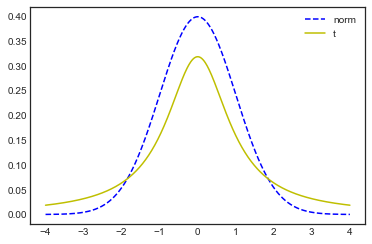

In [37]:
from scipy.stats import  t
norm_pdf = norm.pdf(xs)
t_pdf = t.pdf(xs,df=1)
plt.plot(xs,norm_pdf,ls="--",color="b",label="norm")
plt.plot(xs,t_pdf,color="y",label="t")
plt.legend()
plt.show()

### 3. Degrees of freedom

As we increase the degrees of freedom, the t-distribution gets closer to the normal distribution. In fact, a normal distribution is a t-distribution with infinite degrees of freedom. Degrees of freedom are defined as the maximum number of logically independent values in the data sample. That's a fairly tricky concept, so let's try an example.

In [38]:
def plot_t(dfs):
    for df in dfs:
        plt.plot(xs,t.pdf(xs,df),label=f"t: df = {df}")

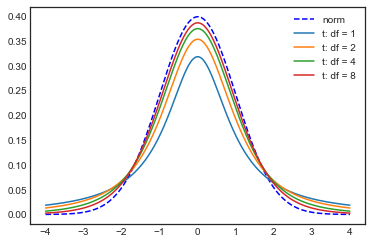

In [39]:
plt.plot(xs,norm_pdf,ls="--",color="b",label="norm")
plot_t([1,2,4,8])
plt.legend()
plt.show()

### 4. Calculating degrees of freedom

Suppose our dataset has 5 independent observations, and that four of the values are 2, 6, 8, and 5. Suppose we also know the sample mean is 5. With this knowledge, the fifth value is no longer independent; it must be 4. Even though all five observations in the sample were independent, because we know an additional fact about the sample - that is has a mean of 5 - we only have 4 degrees of freedom. In our two sample case, there are as many degrees of freedom as observations, minus two because we know two sample statistics, the means for each group.

### 5. Hypotheses

Recall the hypotheses for our Stack Overflow question about compensation for the two age groups. Since this is a "greater than" alternative hypothesis, we need a right-tailed test.

### 6. Significance level

We're going to calculate a p-value in a moment, but we first need to decide on a significance level. There are several possibilities; let's use point-one. That means that we reject the null hypothesis in favor of the alternative if the p-value is less-than-or-equal-to point-one.

### 7. Calculating p-values: one proportion vs. a value

In Chapter 1, to get the p-value, we transformed the z-score with the normal CDF. Since it was a right-tailed test, we subtracted the result from one. In the previous video, we used an approximation for the test statistic standard error using sample information. Using this approximation adds more uncertainty and that's why this is a t instead of a z problem. The t distribution allows for more uncertainty when using multiple estimates in a single statistic calculation. Here, the multiple estimates correspond to the sample mean and the sample standard deviation.

### 8. Calculating p-values: two means from different groups

Now we are calculating means rather than proportions, the z-score is replaced with a t test statistic. This is the value calculated in the previous video. The calculation also needs the degrees of freedom, which is the total number of observations in both groups, minus two.

In [40]:
x_bar = stack_overflow.groupby('age_first_code_cut')["converted_comp"].mean()
s = stack_overflow.groupby('age_first_code_cut')["converted_comp"].std()
n = stack_overflow.groupby('age_first_code_cut')["converted_comp"].count()

In [41]:
numerator = x_bar.child - x_bar.adult
denominator = np.sqrt((s.child ** 2 / n.child) + (s.adult ** 2 / n.adult))
t_stat = numerator /denominator
t_stat

1.8699313316221844

In [42]:
degrees_of_freedom = n.child + n.adult -2
degrees_of_freedom

2259

### 9. Calculating p-values: two means from different groups

To calculate the p-value, we need to transform the test statistic using the t-distribution CDF instead of the normal distribution CDF. Notice the use of t-dot-cdf instead of norm-dot-cdf, and that the df argument is set to the degrees of freedom. This p-value is less than the significance level of point-one, so we should reject the null hypothesis in favor of the alternative hypothesis that Stack Overflow data scientists who started coding as children earn more.

In [43]:
1 - t.cdf(t_stat,df=degrees_of_freedom)

0.030811302165157595

### 10. Let's practice!

While I reevaluate my own childhood and wonder why I didn't start programming earlier, time for you to do some exercises.

## From t to p

<p>Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (<code>late == "No"</code>) compared to shipments that were late (<code>late == "Yes"</code>). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.</p>
<p>Recall the hypotheses:</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="2" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-texatom size="s" texclass="ORD"><mjx-mn class="mjx-n"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mn>0</mn></mrow></msub></math></mjx-assistive-mml></mjx-container>: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="3" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.153em;"><mjx-texatom size="s" texclass="ORD"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D434 TEX-I"></mjx-c></mjx-mi></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mi>A</mi></mrow></msub></math></mjx-assistive-mml></mjx-container>: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.</p>
<p>The test statistic, <code>t_stat</code>, is available, as are the samples sizes for each group, <code>n_no</code> and <code>n_yes</code>. Use a significance level of <code>alpha = 0.05</code>.</p>
<p><code>t</code> has also been imported from <code>scipy.stats</code>.</p>

In [44]:
s = late_shipments.groupby("late")["weight_kilograms"].std()
x_bar = late_shipments.groupby("late")["weight_kilograms"].mean()
n = late_shipments.groupby("late")["weight_kilograms"].count()
numerator = x_bar.No - x_bar.Yes
denominator = np.sqrt(s.No ** 2 / n.No  + s.Yes **2 /n.Yes)
t_stat = numerator /denominator
t_stat

-2.3936661778766433

In [45]:
degrees_of_freedom = n.No + n.Yes -2
p_value = t.cdf(t_stat,df=degrees_of_freedom)
p_value

0.008432382146249523

## Pairing is caring

### 1. Pairing is caring

Previously, we used the t-distribution to compute a p-value from a standardized test statistic related to the difference in means across two groups.

### 2. US Republican presidents dataset

Here's a dataset of US presidential elections. Each row represents a presidential election at the county level. The variables in the dataset are the US state, the county within that state, and the percentage of votes for the Republican candidate in 2008, and in 2012.

In [46]:
repub_votes_potus_08_12 = pd.read_feather("data/repub_votes_potus_08_12.feather")
repub_votes_potus_08_12.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


### 3. Hypotheses

One question : **whether the percentage of votes for the Republican candidate was lower in 2008 compared to 2012?**


To test this, we form hypotheses. As before, the null hypothesis is that our hunch is wrong, and that the population parameters are the same in each year group. The alternative hypothesis is that the parameter in 2008 was lower than in 2012. Let's set a significance level of point-zero-five. One feature of this dataset is that the 2008 votes and the 2012 votes are paired, which means they aren't independent, since they both refer to the same county. This means voting patterns may occur due to county-level demographics and local politics, and we want to capture this pairing in our model.

$$H_0 : \mu_{2008} - \mu_{2012} = 0$$
$$H_A : \mu_{2008} - \mu_{2012} \lt 0$$

$$\alpha = 0.05$$


### 4. From two samples to one

For paired analyses, rather than considering the two variables separately, we can consider a single variable of the difference. This is stored in a DataFrame called sample_data with a column named diff. In this histogram of the difference, most values are between minus ten and ten, with at least one outlier.

In [47]:
sample_data = repub_votes_potus_08_12

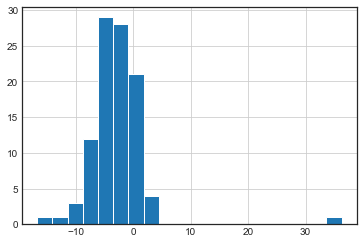

In [48]:

sample_data["diff"] = sample_data["repub_percent_08"] - sample_data["repub_percent_12"]
sample_data["diff"].hist(bins=20)
plt.show()

### 5. Calculate sample statistics of the difference

The sample mean, x-bar, is calculated from this difference. It is around minus two-point-eight-eight.

In [49]:
x_bar_diff = sample_data["diff"].mean()
x_bar_diff

-2.8771090412429454

### 6. Revised hypotheses

We can restate the hypotheses in terms of the single population mean, mu-diff, being equal to or less than zero. The test statistic, t, has a slightly simpler equation compared to the two sample case. We have one statistic, so the number of degrees of freedom is the number of pairs minus one.

Old Hypo :

$$H_0 : \mu_{2008} - \mu_{2012} = 0$$
$$H_A : \mu_{2008} - \mu_{2012} \lt 0$$

New Hypo:
$$H_0 : \mu_{diff} = 0$$
$$H_A : \mu_{diff} \lt 0$$

In [50]:
n_diff = len(sample_data)
s_diff = sample_data["diff"].std()
t_stat = x_bar_diff / np.sqrt((s_diff**2) /n_diff)
t_stat

-5.601043121928492

In [51]:
p_value =t.cdf(t_stat,df = (n_diff  -1 ))
p_value

9.572537285272304e-08

### 8. Testing differences between two means using ttest()

That was a lot of calculating. Fortunately, there's an easier way. The pinguoin package provides a variety of different methods for hypothesis testing and returns the results as a pandas DataFrame. Its output can be a little friendlier to work with than similar methods from scipy-dot-stats. One method from pingouin is ttest and it works with array-like objects, so the first argument is the Series of differences. For a converted one sample test like this, y specifies the hypothesized difference value from the null hypothesis, which is zero. The type of alternative hypothesis can be specified as two-sided, less, or greater, corresponding to two-tailed, left-tailed, and right-tailed tests, respectively. Here's the output. We can recognize the value of the test statistic, the degrees of freedom, the alternative direction, and the p-value. The additional output refers to more advanced statistical concepts that are outside the scope of this course.

In [52]:
import pingouin
pingouin.ttest(x=sample_data["diff"],
               y=0,
               alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


### 9. ttest() with paired=True

There's a variation of ttest for paired data that requires even less work. Rather than calculating the difference between the two paired variables, we can just pass them both directly to ttest as x and y, and set paired to True. Notice that the results in the first four columns are the same as before.

In [53]:
pingouin.ttest(x=sample_data["repub_percent_08"],
               y=sample_data["repub_percent_12"],
               paired=True,
               alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


### 10. Unpaired ttest()

If we don't set paired to True and instead perform an unpaired t-test, then the numbers change. The test statistic is closer to zero, there are more degrees of freedom, and the p-value is much larger. Performing an unpaired t-test when our data is paired increases the chances of false negative errors.

In [54]:
pingouin.ttest(x=sample_data["repub_percent_08"],
               y=sample_data["repub_percent_12"],
               paired=False,
               alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


### 11. Let's practice!

Time to perform some pairing.

## Visualizing the difference

<p>Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.</p>
<p>Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, <code>sample_dem_data</code>. Since the counties are the same in both years, these samples are paired. The columns containing the samples are <code>dem_percent_12</code> and <code>dem_percent_16</code>.</p>
<p><code>dem_votes_potus_12_16</code> is available as <code>sample_dem_data</code>. <code>pandas</code> and <code>matplotlib.pyplot</code> are loaded with their usual aliases.</p>

In [55]:
sample_dem_data = pd.read_feather("data/dem_votes_potus_12_16.feather")

Create a new <code>diff</code> column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.

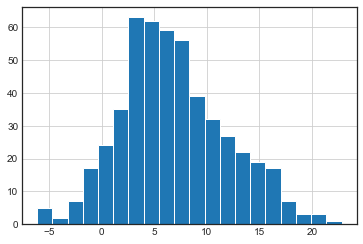

In [56]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data["diff"].hist(bins=20)
plt.show()

## Using ttest()

<p>Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the <code>pingouin</code> Python package has a <code>.ttest()</code> method to accomplish it. This method provides some flexibility in how you perform the test.</p>
<p>As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.</p>
<p><code>sample_dem_data</code> is available and has the columns <code>diff</code>, <code>dem_percent_12</code>, and <code>dem_percent_16</code> in addition to the <code>state</code> and <code>county</code> names. <code>pingouin</code> and has been loaded along with <code>pandas</code> as <code>pd</code>.</p>

Conduct a t-test on the sample differences (the <code>diff</code> column of <code>sample_dem_data</code>), using an appropriate alternative hypothesis chosen from <code>"two-sided"</code>, <code>"less"</code>, and <code>"greater"</code>.

In [57]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data["diff"],y=0,alternative="two-sided")

test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


In [58]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],
                              y=0,
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data["dem_percent_12"],
                                     y=sample_dem_data["dem_percent_16"],
                                     paired=True,
                                     alternative="two-sided")




# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


## P-hacked to pieces

### 1. P-hacked to pieces

We've seen how to compare two groups in the unpaired and paired cases. But what if there are more than two groups?

### 2. Job satisfaction: 5 categories

The Stack Overflow survey includes a job satisfaction variable, with five categories from "Very satisfied" down to "Very dissatisfied".

In [59]:
stack_overflow["job_sat"].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

### 3. Visualizing multiple distributions

Suppose we want to know if mean annual compensation is different for each of the levels of job satisfaction. The first thing to do is visualize the distributions with box plots. Seaborn's boxplot method provides a nice option here with converted_comp on the horizontal axis and job_sat on the vertical axis using the stack_overflow data. "Very satisfied" looks slightly higher than the others, but to see if they are significantly different, we'll need to use hypothesis tests.

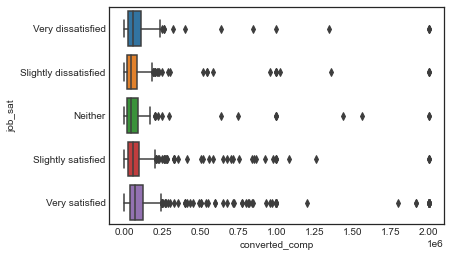

In [60]:
import seaborn as sns
sns.boxplot(data=stack_overflow,
            x="converted_comp",
            y="job_sat")
plt.show()

### 4. Analysis of variance (ANOVA)

ANOVA tests determine whether there are differences between the groups. We begin by setting our significance level to point-two. This value is larger than in many situations but will help us understand the implications on comparing different numbers of groups later on. We use the pinguoin anova method to compare values across multiple groups. We specify the data as stack_overflow, the dependent variable, dv, as converted_comp, and the column of groups to calculate between as job_sat. The p-value is stored in the p-unc column, which is point-zero-zero-one-three, which is smaller than alpha at 20 percent. That means that at least two of the categories of job satisfaction have significant differences between their compensation levels, but this doesn't tell us which two categories they are.

In [61]:
pingouin.anova(data=stack_overflow,
               dv="converted_comp",
               between="job_sat")

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


### 5. Pairwise tests

To identify which categories are different, we compare all five job satisfaction categories, testing on each pair in turn. There are ten ways of choosing two items from a set of five, so we have ten tests to perform. Our significance level is still point-two.

### 6. pairwise_ttests()

To run all these hypothesis tests in one go, we can use pairwise_ttests. The first three arguments of data, dv, and between are the same as the anova method. We'll discuss p-adjust shortly. The result shows a DataFrame where A and B are the two levels being compared on each row. Next, we look at the p-unc column of p-values. Three of these are less than our significance level of point-two.

In [62]:
pingouin.pairwise_ttests(data=stack_overflow,
                         dv="converted_comp",
                         between="job_sat",
                         padjust="none")

C:\Users\Lenovo\anaconda3\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131


### 7. As the number of groups increases...

In this case we have five groups, resulting in ten pairs. As the number of groups increases, the number of pairs - and hence the number of hypothesis tests we must perform - increases quadratically. The more tests we run, the higher the chance that at least one of them will give a false positive significant result. With a significance level of point-two, if we run one test, the chance of a false positive result is point-two. With five groups and ten tests, the probability of at least one false positive is around point-seven. With twenty groups, it's almost guaranteed that we'll get at least one false positive.
<br>
<img src="image/img_7.png">

### 8. Bonferroni correction

The solution to this is to apply an adjustment to increase the p-values, reducing the chance of getting a false positive. One common adjustment is the Bonferroni correction. Looking at the p-corr column corresponding to corrected p-values, as opposed to the p-unc column for uncorrected, only two of the pairs appear to have significant differences.

In [63]:
pingouin.pairwise_tests(data=stack_overflow,
                         dv="converted_comp",
                         between="job_sat",
                         padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


### 9. More methods

pingouin provides several options for adjusting the p-values with some being more conservative than others. No adjustment with none is the default, but in almost all pairwise t-testing situations choosing a correction method is more appropriate.

### 10. Let's practice!

Let's run lots of tests.

## Visualizing many categories

<p>So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.</p>
<p>Here, we'll return to the late shipments data, and how the price of each package (<code>pack_price</code>) varies between the three shipment modes (<code>shipment_mode</code>): <code>"Air"</code>, <code>"Air Charter"</code>, and <code>"Ocean"</code>.</p>
<p><code>late_shipments</code> is available; <code>pandas</code> and <code>matplotlib.pyplot</code> are loaded with their standard aliases, and <code>seaborn</code> is loaded as <code>sns</code>.</p>

Group <code>late_shipments</code> by <code>shipment_mode</code> and calculate the mean <code>pack_price</code> for each group, storing the result in <code>xbar_pack_by_mode</code>.

In [64]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")["pack_price"].mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [65]:

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()
s_pack_by_mode

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64

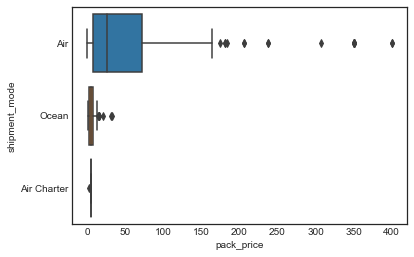

In [66]:
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(data=late_shipments,x="pack_price",y="shipment_mode")
plt.show()

## ANOVA

<p>The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="2" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-texatom size="s" texclass="ORD"><mjx-mn class="mjx-n"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mn>0</mn></mrow></msub></math></mjx-assistive-mml></mjx-container>: Pack prices for every category of shipment mode are the same.</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="3" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.153em;"><mjx-texatom size="s" texclass="ORD"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D434 TEX-I"></mjx-c></mjx-mi></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mi>A</mi></mrow></msub></math></mjx-assistive-mml></mjx-container>: Pack prices for some categories of shipment mode are different.</p>
<p>We'll set a significance level of 0.1.</p>
<p><code>late_shipments</code> is available and <code>pingouin</code> has been loaded.</p>

Run an ANOVA on <code>late_shipments</code> investigating <code>'pack_price'</code> (the dependent variable) between the groups of <code>'shipment_mode'</code>.

In [67]:
# Run an ANOVA for pack_price across shipment_mode
anova_results =pingouin.anova(data=late_shipments,dv="pack_price",between="shipment_mode")



# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to

## Pairwise t-tests

<p>The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.</p>
<p><code>late_shipments</code> is available and <code>pingouin</code> has been loaded.</p>

Perform pairwise t-tests on <code>late_shipments</code>'s <code>pack_price</code> variable, grouped by <code>shipment_mode</code>, without doing any p-value adjustment.

In [68]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_ttests(data=late_shipments,dv="pack_price",between="shipment_mode",padjust=None)




# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


C:\Users\Lenovo\anaconda3\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [69]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments,
                                            dv="pack_price",
                                            between="shipment_mode",
                                            padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


# Letting the Categoricals Out of the Bag

## Difference strokes for proportions, folks

### 1. Difference strokes for proportions, folks

Let’s return to thinking about testing proportions, as we did in Chapter 1.

### 2. Chapter 1 recap

The hypothesis tests in Chapter 1 measured whether or not an unknown population proportion was equal to some value. We used bootstrapping on the sample to estimate the standard error of the sample statistic. The standard error was then used to calculate a standardized test statistic, the z-score, which was used to get a p-value, so we could decide whether or not to reject the null hypothesis. A bootstrap distribution can be computationally intensive to calculate, so this time we'll instead calculate the test statistic without it.

### 3. Standardized test statistic for proportions

An unknown population parameter that is a proportion, or population proportion for short, is denoted p. The sample proportion is denoted p-hat, and the hypothesized value for the population proportion is denoted p-zero. As in Chapter 1, the standardized test statistic is a z-score. We calculate it by starting with the sample statistic, subtracting its mean, then dividing by its standard error. p-hat minus the mean of p-hat, divided by the standard error of p-hat. Recall from Sampling in Python that the mean of a sampling distribution of sample means, denoted by p-hat, is p, the population proportion. Under the null hypothesis, the unknown proportion p is assumed to be the hypothesized population proportion p-zero. The z-score is now p-hat minus p-zero, divided by the standard error of p-hat.

$$z = \frac{\hat{p} - p_0}{\mbox{SE}({\hat{p}})}$$

### 4. Simplifying the standard error calculations

For proportions, under H-naught, the standard error of p-hat equation can be simplified to p-zero times one minus p-zero, divided by the number of observations, then square-rooted. We can substitute this into our equation for the z-score. This is easier to calculate because it only uses p-hat and n, which we get from the sample, and p-zero, which we chose.

$$\mbox{SE} = \sqrt{\frac{p_0 * (1 - p_o)}{n}}$$

### 5. Why z instead of t?

We might wonder why we used a z-distribution here, but a t-distribution in Chapter 2. This is the test statistic equation for the two sample mean case. The standard deviation of the sample, s, is calculated from the sample mean, x-bar. That means that x-bar is used in the numerator to estimate the population mean, and in the denominator to estimate the population standard deviation. This dual usage increases the uncertainty in our estimate of the population parameter. Since t-distributions are effectively a normal distribution with fatter tails, we can use them to account for this extra uncertainty. In effect, the t-distribution provides extra caution against mistakenly rejecting the null hypothesis. For proportions, we only use p-hat in the numerator, thus avoiding the problem with uncertainty, and a z-distribution is fine.

### 6. Stack Overflow age categories

Returning to the Stack Overflow survey, let's hypothesize that half of the users in the population are under thirty and check for a difference. Let's set a significance level of point-zero-one. In the sample, just over half the users are under thirty.

$$H_0: \mbox{Proportion of stack overflow user under thirty} = 0.5$$
$$H_A: \mbox{Proportion of stack overflow user under thirty} \neq 0.5$$


In [70]:
alpha =0.01
stack_overflow["age_cat"].value_counts(normalize=True)

Under 30       0.535604
At least 30    0.464396
Name: age_cat, dtype: float64

### 7. Variables for z

Let's get the numbers needed for the z-score. p-hat is the proportion of sample rows where age_cat equals under thirty. p-zero is point-five according to the null hypothesis. n is the number of rows in the dataset.

In [71]:
p_hat = (stack_overflow["age_cat"] == "Under 30").mean()
p_0 = 0.50
n = len(stack_overflow)

### 8. Calculating the z-score

Inserting the values we calculated into the z-score equation yields a z-score of around three-point-four.

In [72]:
numerator = p_hat - p_0
denominator = np.sqrt((p_0 * (1 - p_0))/n)
z_score = numerator /denominator
z_score

3.385911440783663

### 9. Calculating the p-value

For left-tailed alternative hypotheses, we transform the z-score into a p-value using norm-dot-cdf. For right-tailed alternative hypotheses, we subtract the norm-dot-cdf result from one. For two-tailed alternative hypotheses, we check whether the test statistic lies in either tail, so the p-value is the sum of these two values: one corresponding to the z-score and the other to its negative on the other side of the distribution. Since the normal distribution PDF is symmetric, this simplifies to twice the right-tailed p-value since the z-score is positive. Here, the p-value is less than the significance level of point-zero-one, so we reject the null hypothesis, concluding that the proportion of users under thirty is not equal to point-five.

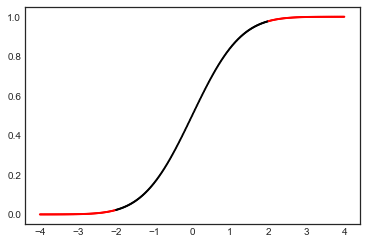

In [73]:
normal["cdf"] = norm.cdf(normal["x"])
normal.head()
color = ["r" if abs(x)>2 else "k" for x in normal["x"]]
plt.scatter(normal["x"],normal["cdf"],c=color,s=1)
plt.show()

In [74]:
# left tails for (less than)
norm.cdf(z_score)

0.999645288631595

In [75]:
# right tail for (grater that)
1 - norm.cdf(z_score)

0.00035471136840503625

In [76]:
# two side test for the not equal
p_value = 2 * (1 - norm.cdf(z_score))
p_value


0.0007094227368100725

In [77]:
p_value <= alpha

True

Since p_value is less than the alpha value ,we reject the null hypothesis so we conclude that
proportion of StackOverflow user under thirty is not equal to 0.5

### 10. Let's practice!

Let's try an example.

## Test for single proportions

<p>In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was <strong>greater than</strong> 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="1" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D467 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mstyle space="4"><mjx-mfrac><mjx-frac type="d"><mjx-num><mjx-nstrut type="d"></mjx-nstrut><mjx-mrow><mjx-texatom texclass="ORD"><mjx-mover><mjx-over style="padding-bottom: 0.06em; padding-left: 0.085em; margin-bottom: -0.531em;"><mjx-mo class="mjx-n"><mjx-c class="mjx-c5E"></mjx-c></mjx-mo></mjx-over><mjx-base><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D45D TEX-I"></mjx-c></mjx-mi></mjx-base></mjx-mover></mjx-texatom><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2212"></mjx-c></mjx-mo><mjx-msub space="3"><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D45D TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-texatom size="s" texclass="ORD"><mjx-mn class="mjx-n"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-texatom></mjx-script></mjx-msub></mjx-mrow></mjx-num><mjx-dbox><mjx-dtable><mjx-line type="d"></mjx-line><mjx-row><mjx-den><mjx-dstrut type="d"></mjx-dstrut><mjx-msqrt><mjx-sqrt><mjx-surd><mjx-mo class="mjx-s3"><mjx-c class="mjx-c221A TEX-S3"></mjx-c></mjx-mo></mjx-surd><mjx-box style="padding-top: 0.129em;"><mjx-mstyle><mjx-mfrac><mjx-frac type="d"><mjx-num><mjx-nstrut type="d"></mjx-nstrut><mjx-mrow><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D45D TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-texatom size="s" texclass="ORD"><mjx-mn class="mjx-n"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-texatom></mjx-script></mjx-msub><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2217"></mjx-c></mjx-mo><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c28"></mjx-c></mjx-mo><mjx-mn class="mjx-n"><mjx-c class="mjx-c31"></mjx-c></mjx-mn><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2212"></mjx-c></mjx-mo><mjx-msub space="3"><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D45D TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-texatom size="s" texclass="ORD"><mjx-mn class="mjx-n"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-texatom></mjx-script></mjx-msub><mjx-mo class="mjx-n"><mjx-c class="mjx-c29"></mjx-c></mjx-mo></mjx-mrow></mjx-num><mjx-dbox><mjx-dtable><mjx-line type="d"></mjx-line><mjx-row><mjx-den><mjx-dstrut type="d"></mjx-dstrut><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D45B TEX-I"></mjx-c></mjx-mi></mjx-den></mjx-row></mjx-dtable></mjx-dbox></mjx-frac></mjx-mfrac></mjx-mstyle></mjx-box></mjx-sqrt></mjx-msqrt></mjx-den></mjx-row></mjx-dtable></mjx-dbox></mjx-frac></mjx-mfrac></mjx-mstyle></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>z</mi><mo>=</mo><mstyle displaystyle="true" scriptlevel="0"><mfrac><mrow><mrow><mover><mi>p</mi><mo stretchy="false">^</mo></mover></mrow><mo>−</mo><msub><mi>p</mi><mrow><mn>0</mn></mrow></msub></mrow><msqrt><mstyle displaystyle="true" scriptlevel="0"><mfrac><mrow><msub><mi>p</mi><mrow><mn>0</mn></mrow></msub><mo>∗</mo><mo stretchy="false">(</mo><mn>1</mn><mo>−</mo><msub><mi>p</mi><mrow><mn>0</mn></mrow></msub><mo stretchy="false">)</mo></mrow><mi>n</mi></mfrac></mstyle></msqrt></mfrac></mstyle></math></mjx-assistive-mml></mjx-container></p>
<p>You'll revisit the p-value using this simpler calculation.</p>
<p><code>late_shipments</code> is available. <code>pandas</code> and <code>numpy</code> are available under their usual aliases, and <code>norm</code> is loaded from <code>scipy.stats</code>.</p>

In [78]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


Hypothesize that the proportion of late shipments is 6%.

Calculate the sample proportion of shipments where <code>late</code> equals <code>"Yes"</code>.

Calculate the number of observations in the sample.

$$H_0: \mbox{Proportion of late shipment} = 0.6$$
$$H_A: \mbox{Proportion of late shipment} \gt 0.6$$

In [79]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments["late"] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [80]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator
z_score

0.13315591032282698

In [81]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


## A sense of proportion

### 1. A sense of proportion

The previous lesson tested a single proportion against a specific value. As with means, we can also test differences between proportions in two populations.

### 2. Comparing two proportions

The Stack Overflow survey contains a hobbyist variable. The value "Yes" means the user described themselves as a hobbyist and "No" means they described themselves as a professional. We can hypothesize that the proportion of hobbyist users is the same for the under thirty age category as the thirty or over category. We again test for a difference in a two-tailed test. More formally, the null hypothesis is that the difference between the population parameters for each group is zero. Let's set a significance level of point-zero-five.

$$H_0: \mbox{Proportion of hobbyist user is the same for those under thirty as those at least thirty} $$
$$H_0 : p_{>30} - p_{<30} = 0$$
$$H_A:\mbox{ Proportion of hobbyist user is the different for those under thirty as those at least thirty} $$
$$H_A : p_{>30} - p_{<30} \neq 0$$

In [82]:
alpha = 0.05

### 3. Calculating the z-score

Let's break down this z-score equation. The sample statistic is the difference in the proportions for each category. That's the two p-hat values on the numerator. We subtract the hypothesized value of the population parameter, and assuming the null hypothesis is true, it's zero, so the term disappears. The denominator is the standard error of the sample statistic. Again, we can avoid having to generate a bootstrap distribution to calculate the standard error. The equation for the standard error is a slightly more complicated version than the one sample case. In this equation, note that p-hat is the sample proportion for the whole dataset, not for each category. This whole dataset p-hat is known as a pooled estimate of the population proportion. We need one final equation to calculate p-hat. It's a weighted mean of the p-hats for each category. This looks horrendous, but Python is great at handling arithmetic. We now only need four numbers from the sample dataset to do these calculations and calculate the z-score.

$$z = \frac{\hat{p}_{\geq 30} - \hat{p}_{<30}} {\mbox{SE}(\hat{p}_{\geq 30} - \hat{p}_{<30})}$$
$${\mbox{SE}(\hat{p}_{\geq 30} - \hat{p}_{<30})} = \sqrt{\frac{\hat{p} * 1 - \hat{p}}{n_{\geq30}} + \frac{\hat{p} * 1 - \hat{p}}{n_{\leq30}}}$$


$\hat{p}$ - pooled estimate for p (common unknown proportion of success)

$$ \hat{p} = \frac{n_{\geq 30} * \hat{p}_{\geq 30} + n_{\lt 30} * \hat{p}_{\lt 30}}{n_{\geq 30} + n_{\lt 30}}$$

### 4. Getting the numbers for the z-score

To calculate these four numbers, we group by the age category, and calculate the sample proportion using dot-value_counts with normalize as True, and the row counts using dot-count. We'll focus on the hobbyist Yes rows.

In [83]:
p_hats = stack_overflow.groupby("age_cat")["hobbyist"].value_counts(normalize=True)
p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

In [84]:
n = stack_overflow.groupby("age_cat")["hobbyist"].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

### 5. Getting the numbers for the z-score

To isolate the success counts from p_hats, we can use pandas multiIndex subsetting, passing a tuple of the outer column and inner column values. There are 812 yes values in the at least thirty group, and 1021 in the under thirty group.

In [85]:
p_hat_at_least_30 = p_hats[("At least 30","Yes")]
p_hat_under_30 = p_hats[("Under 30","Yes")]
n_at_least_30 = n["At least 30"]
n_under_30 = n["Under 30"]

### 6. Getting the numbers for the z-score

The overall group counts can be extracted with simpler subsetting. There are 1050 rows overall for the at least thirty group and 1211 for the under 30 group.

In [86]:
p_hat = ((n_under_30 * p_hat_under_30) + (n_at_least_30 * p_hat_at_least_30)) / (n_at_least_30 + n_under_30)
std_error = np.sqrt(((p_hat * (1 - p_hat) )/ n_under_30) + ((p_hat * (1 - p_hat)) / n_at_least_30))
z_score =( p_hat_at_least_30 - p_hat_under_30) / std_error
z_score

-4.223691463320559

In [87]:
p_value =(norm.cdf(z_score))*2
p_value

2.403330142685068e-05

### 7. Getting the numbers for the z-score

After that, we can do the arithmetic using our equations for p_hat, the standard error, and the z-score to get the test statistic. The z-score is minus four-point-two-two. Luckily, we can avoid this math.

### 8. Proportion tests using proportions_ztest()

We can use proportions_ztest from statsmodels-dot-stats-dot-proportion to calculate this z-score more directly. This method requires two objects as NumPy arrays. The first being how many Yes's we have in each group and the second is the total number of rows in each age group. We can get these numbers from dot-value_counts on hobbyist grouped by age_cat. Next, we pass these values to the count and nobs arguments of the proportions_ztest method. We are testing for a difference, so we specify that this is a two-sided test. The method returns a z-score and a p-value, which we have stored in stat and p_value, respectively. The p-value is smaller than the five percent significance level we specified, so we can conclude that there is a difference in the proportion of Stack Overflow hobbyists between the under and over thirty groups.

In [88]:
hobbyist_by_age = stack_overflow.groupby("hobbyist")["age_cat"].value_counts()
hobbyist_by_age

hobbyist  age_cat    
No        At least 30     238
          Under 30        190
Yes       Under 30       1021
          At least 30     812
Name: age_cat, dtype: int64

In [89]:
hobbyist_by_age = stack_overflow.groupby("hobbyist")["age_cat"].value_counts()
hobbyist_by_age = hobbyist_by_age.unstack()
hobbyist_by_age

age_cat,At least 30,Under 30
hobbyist,,
No,238,190
Yes,812,1021


In [90]:
hobbyist_by_age.sum()

age_cat
At least 30    1050
Under 30       1211
dtype: int64

In [91]:
from statsmodels.stats.proportion import proportions_ztest
hobbyist_by_age = stack_overflow.groupby("hobbyist")["age_cat"].value_counts()
hobbyist_by_age = hobbyist_by_age.unstack()
success_counts = hobbyist_by_age.loc["Yes"].to_numpy()
n = hobbyist_by_age.sum().to_numpy()
proportions_ztest(count=success_counts,nobs = n,alternative="two-sided")

(-4.223691463320559, 2.403330142685068e-05)

### 9. Let's practice!

Time for some proportion tests.

## Test for two proportions

<p>You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the <code>late_shipments</code> dataset, whether or not the shipment was late is stored in the <code>late</code> column. Freight costs are stored in the <code>freight_cost_group</code> column, and the categories are <code>"expensive"</code> and <code>"reasonable"</code>.</p>
<p>The hypotheses to test, with <code>"late"</code> corresponding to the proportion of late shipments for that group, are</p>
$$H_0 : \mbox{late}_{\mbox{expensive}} - \mbox{late}_{\mbox{resonable}} = 0 $$
$$H_A : \mbox{late}_{\mbox{expensive}} - \mbox{late}_{\mbox{resonable}} \gt 0 $$
<p><code>p_hats</code> contains the estimates of population proportions (sample proportions) for the <code>"expensive"</code> and <code>"reasonable"</code> groups. <code>ns</code> contains the sample sizes for these groups. <code>p_hats</code> and <code>ns</code> have been printed for you.</p>
<p><code>pandas</code> and <code>numpy</code> have been imported under their usual aliases, and <code>norm</code> is available from <code>scipy.stats</code>.</p>

In [92]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [93]:
p_hats = late_shipments.groupby("late")["freight_cost_groups"].value_counts(normalize=True)["Yes"]
p_hats

freight_cost_groups
expensive     0.724138
reasonable    0.275862
Name: freight_cost_groups, dtype: float64

In [94]:
ns = late_shipments.groupby("freight_cost_groups")["late"].count()
ns

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

Calculate the pooled sample proportion, <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="10" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-texatom texclass="ORD"><mjx-mover><mjx-over style="padding-bottom: 0.06em; padding-left: 0.085em; margin-bottom: -0.531em;"><mjx-mo class="mjx-n"><mjx-c class="mjx-c5E"></mjx-c></mjx-mo></mjx-over><mjx-base><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D45D TEX-I"></mjx-c></mjx-mi></mjx-base></mjx-mover></mjx-texatom></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mover><mi>p</mi><mo stretchy="false">^</mo></mover></mrow></math></mjx-assistive-mml></mjx-container>, from <code>p_hats</code> and <code>ns</code>.

In [95]:
# Calculate the pooled estimate of the population proportion
p_hat = (ns.expensive * p_hats.expensive + ns.reasonable * p_hats.reasonable) / (ns.expensive + ns.reasonable)

# Print the result
print(p_hat)

0.5172763516821711


In [96]:

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = (1 - p_hat) * p_hat

In [97]:

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = (p_hat_times_not_p_hat / ns).sum()
p_hat_times_not_p_hat_over_ns.sum()

0.0010190422643783787

In [98]:

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)


# Print the result
print(std_error)

0.0319224413912592


In [99]:

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

0.0


## proportions_ztest() for two samples

<p>That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the <code>statsmodels</code> package.</p>
<p>Recall the hypotheses.</p>

$$H_0 : \mbox{late}_{\mbox{expensive}} - \mbox{late}_{\mbox{resonable}} = 0 $$
$$H_A : \mbox{late}_{\mbox{expensive}} - \mbox{late}_{\mbox{resonable}} \gt 0 $$

<p><code>late_shipments</code> is available, containing the <code>freight_cost_group</code> column. <code>numpy</code> and <code>pandas</code> have been loaded under their standard aliases, and <code>proportions_ztest</code> has been loaded from <code>statsmodels.stats.proportion</code>.</p>

Get the counts of the <code>late</code> column grouped by <code>freight_cost_group</code>.

In [100]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Put the two "Yes" counts into an array
success_counts = np.array([45,16])

# Put the two group counts into an array
n = np.array([500+45,439+16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts,nobs=n,
                                  alternative="larger")


# Print the results
print(stat, p_value)

3.1190401865206128 0.0009072060637051224


## Declaration of independence

### 1. Declaration of independence

Just as ANOVA extends t-tests to more than two groups, chi-square tests of independence extend proportion tests to more than two groups.

### 2. Revisiting the proportion test

Here's the proportions test from the last video. The test statistic is the z-score of minus four-point-two-two.

In [101]:
hobbyist_by_age = stack_overflow.groupby("hobbyist")["age_cat"].value_counts()
hobbyist_by_age = hobbyist_by_age.unstack()
success_counts = hobbyist_by_age.loc["Yes"].to_numpy()
n = hobbyist_by_age.sum().to_numpy()
proportions_ztest(count=success_counts,nobs = n,alternative="two-sided")

(-4.223691463320559, 2.403330142685068e-05)

### 3. Independence of variables

That proportion test had a positive result. The small p-value suggested that there was evidence that the hobbyist and age category variables had an association. If the proportion of hobbyists was the same for each age category, the variables would be considered statistically independent. More formally, two categorical variables are consider statistically independent when the proportion of successes in the response variable is the same across all categories of the explanatory variable.

### 4. Test for independence of variables

The pinguoin package has an indirect way of testing the difference in the proportions from the previous video. To the chi2_independence method, we pass stack_overflow as data, hobbyist as x, and age_cat as y. The correction argument specifies whether or not to apply Yates' continuity correction, which is a fudge factor for when the sample size is very small and the degrees of freedom is one. Since each group has over one hundred observations, we don't need it here. The method returns three different pandas DataFrames: the expected counts, the observed counts, and statistics related to the test. Let's look at stats and focus on the pearson test row and the chi2 and pval columns. The p-value is the same as we had with the z-test of around two in one hundred thousand. The chi2 value is the squared result of our z-score seen in the previous video.

In [102]:
expected , observed ,stats = pingouin.chi2_independence(data=stack_overflow,
                                                        x="hobbyist",y="age_cat",correction=False)
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.839570,1.0,0.000024,0.088826,0.988205
1,cressie-read,0.666667,17.818114,1.0,0.000024,0.088773,0.988126
2,log-likelihood,0.000000,17.802653,1.0,0.000025,0.088734,0.988069
3,freeman-tukey,-0.500000,17.815060,1.0,0.000024,0.088765,0.988115
4,mod-log-likelihood,-1.000000,17.848099,1.0,0.000024,0.088848,0.988236
5,neyman,-2.000000,17.976656,1.0,0.000022,0.089167,0.988694


### 5. Job satisfaction and age category

Let's try another example. Recall that the Stack Overflow sample has an age category variable with two categories and a job satisfaction variable with five categories.

In [103]:
stack_overflow["age_cat"].value_counts()

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64

In [104]:
stack_overflow["job_sat"].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

### 6. Declaring the hypotheses

We can declare hypotheses to test for independence of these variables. Here, age category is the response variable, and job satisfaction is the explanatory variable. The null hypothesis is that independence occurs. Let's use a significance level of point-one. The test statistic is denoted chi-square. It quantifies how far away the observed results are from the expected values if independence was true.

### 7. Exploratory visualization: proportional stacked bar plot

Let's explore the data using a proportional stacked bar plot. We begin by calculating the proportions in each age group. Next, we use the unstack method to convert this table into wide format. Using the plot method and setting kind to bar and stacked to True produces a proportional stacked bar plot.

$$H_0 : \mbox{Age categories are independent of job levels}$$
$$H_0 : \mbox{Age categories are not independent of job levels}$$

In [105]:
alpha = 0.1

### 8. Exploratory visualization: proportional stacked bar plot

If the age category was independent of job satisfaction, the split between the age categories would be at the same height in each of the five bars. There's some variation here, but we'll need a chi-square independence test to determine whether it's a significant difference.

In [106]:
props = stack_overflow.groupby("job_sat")["age_cat"].value_counts(normalize=True)
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


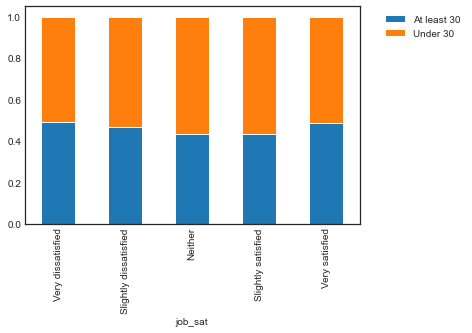

In [107]:
wide_props.plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

### 9. Chi-square independence test

Let's again use the chi-square independence test from pingouin. We have stack_overflow as the data and job_sat and age_cat as x and y. We leave out a correction here since our degrees of freedom is four, calculated by subtracting one from each of the variable categories and multiplying. The p-value is point-two-three, which is above the significance level we set, so we conclude that age categories are independent of job satisfaction.

In [108]:
expected , observed ,stats = pingouin.chi2_independence(data=stack_overflow,x="job_sat",y="age_cat")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


### 10. Swapping the variables?

Swapping the variables, so age category is the response and job satisfaction is the explanatory variable,

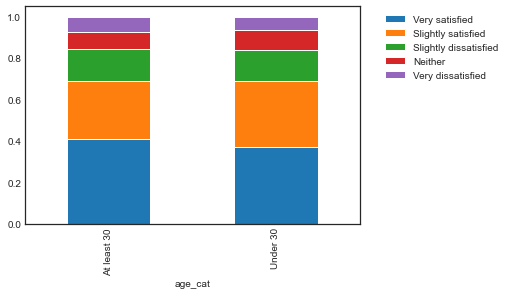

In [109]:
props = stack_overflow.groupby("age_cat")["job_sat"].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

### 11. Swapping the variables?

we see that the splits for each bar are in similar places.

### 12. chi-square both ways

If we run the chi-square test with the variables swapped, then the results are identical. Because of this, we phrase our questions as "are variables X and Y independent?", rather than "is variable X independent from variable Y?", since the order doesn't matter.

In [110]:
expected , observed ,stats = pingouin.chi2_independence(data=stack_overflow,y="job_sat",x="age_cat")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


In [111]:
expected

job_sat,Very dissatisfied,Slightly dissatisfied,Neither,Slightly satisfied,Very satisfied
age_cat,,,,,
At least 30,73.839009,158.823529,93.343653,315.789474,408.204334
Under 30,85.160991,183.176471,107.656347,364.210526,470.795666


In [112]:
observed

job_sat,Very dissatisfied,Slightly dissatisfied,Neither,Slightly satisfied,Very satisfied
age_cat,,,,,
At least 30,78,160,87,296,429
Under 30,81,182,114,384,450


### 13. What about direction and tails?

We didn't worry about tails in this test, and in fact, the chi2_independence method doesn't have an alternative argument. This is because the chi-square test statistic is based on the square of observed and expected counts, and square numbers are non-negative. That means that chi-square tests tend to be right-tailed tests.

### 14. Let's practice!

Time for some practice!

## Chi-square test of independence

<p>The <em>chi-square independence test</em> compares proportions of successes of one categorical variable across the categories of another categorical variable.</p>
<p>Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or <em>incoterms</em> for short.</p>
<p>The <code>late_shipments</code> dataset includes a <code>vendor_inco_term</code> that describes the incoterms that applied to a given shipment. The choices are:</p>
<ul>
<li><a href="https://www.investopedia.com/terms/e/exw.asp" target="_blank" rel="noopener noreferrer"><code>EXW</code></a>: "Ex works". The buyer pays for transportation of the goods.</li>
<li><a href="https://www.investopedia.com/terms/c/carriage-and-insurance-paid-cip.asp" target="_blank" rel="noopener noreferrer"><code>CIP</code></a>: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.</li>
<li><a href="https://www.investopedia.com/terms/d/delivery-duty-paid.asp" target="_blank" rel="noopener noreferrer"><code>DDP</code></a>: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.</li>
<li><a href="https://www.investopedia.com/terms/f/fca.asp" target="_blank" rel="noopener noreferrer"><code>FCA</code></a>: "Free carrier". The seller pays for transportation of the goods.</li>
</ul>
<p>Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of <code>0.01</code>.</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="2" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-texatom size="s" texclass="ORD"><mjx-mn class="mjx-n"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mn>0</mn></mrow></msub></math></mjx-assistive-mml></mjx-container>: <code>vendor_inco_term</code> and <code>freight_cost_group</code> are independent.</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="3" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.153em;"><mjx-texatom size="s" texclass="ORD"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D434 TEX-I"></mjx-c></mjx-mi></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mi>A</mi></mrow></msub></math></mjx-assistive-mml></mjx-container>: <code>vendor_inco_term</code> and <code>freight_cost_group</code> are associated.</p>
<p><code>late_shipments</code> is available, and the following have been loaded: <code>matplotlib.pyplot</code> as <code>plt</code>, <code>pandas</code> as <code>pd</code>, and <code>pingouin</code>.</p>

Calculate the proportion of <code>freight_cost_group</code> in <code>late_shipments</code> grouped by <code>vendor_inco_term</code>.

In [113]:
late_shipments = pd.read_csv("data/late_shipments.csv")
late_shipments.shape


(999, 29)

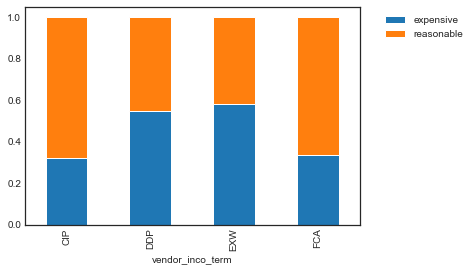

In [114]:
props = late_shipments.groupby("vendor_inco_term")["freight_cost_groups"].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor= (1.05,1))
plt.show()

In [115]:
expected ,observed ,stats = pingouin.chi2_independence(data=late_shipments,x="freight_cost_group",y="vendor_inco_term")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,28.940828,3.0,2.304468e-06,0.170205,0.997750
1,cressie-read,0.666667,28.898219,3.0,2.352466e-06,0.170080,0.997723
2,log-likelihood,0.000000,29.016955,3.0,2.221133e-06,0.170429,0.997798
3,freeman-tukey,-0.500000,29.289337,3.0,1.946837e-06,0.171227,0.997962
4,mod-log-likelihood,-1.000000,29.726470,3.0,1.575527e-06,0.172500,0.998201
5,neyman,-2.000000,31.138154,3.0,7.949731e-07,0.176548,0.998801



Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.

## Does this dress make my fit look good?

### 1. Does this dress make my fit look good?

Last time, we used a chi-square test to compare proportions in two categorical variables. This time, we'll use another variant of the chi-square test to compare a single categorical variable to a hypothesized distribution.

### 2. Purple links

The Stack Overflow survey contains a fun question about how users feel when they discover that they already visited the top resource when trying to solve a coding problem. We can use the dot-value-counts method to get the counts of each group in the purple_link column. We also do a little bit of renaming here to get a DataFrame we can work with later. First, we rename the leftmost column to be purple_link and then assign the counts to n. There are four possible answers, stored in the purple_link variable.

In [116]:
purple_link_counts = stack_overflow["purple_link"].value_counts()
purple_link_counts = purple_link_counts.rename_axis("purple_link").reset_index(name = "n")
purple_link_counts

,purple_link,n
0,"Hello, old friend",1225
1,Indifferent,405
2,Amused,368
3,Annoyed,263


### 3. Declaring the hypotheses

Let's hypothesize that half the users in the population would respond "Hello, old friend", and the other three responses would get one sixth each. We can create a DataFrame for this using the dot-DataFrame method, passing in a dictionary with key-value pairs for each column. We specify the hypotheses as whether or not the sample matches this hypothesized distribution. The test statistic measures how far the observed sample distribution of proportions is from the hypothesized distribution of proportions. Let's set the significance level of point-zero-one.

$$H_0 : \mbox{The sample matches with the hypothesized distribution} $$
$$H_A : \mbox{The sample does not matches with the hypothesized distribution} $$


In [117]:
hypothesized = pd.DataFrame({"purple_link":  purple_link_counts["purple_link"].values,
                             "prop" : [1/2,1/6,1/6,1/6]})
hypothesized

,purple_link,prop
0,"Hello, old friend",0.500000
1,Indifferent,0.166667
2,Amused,0.166667
3,Annoyed,0.166667


In [118]:
alpha = 0.01

### 4. Hypothesized counts by category

To visualize the distribution of the purple links, it will help to have the hypothesized counts. These are the hypothesized proportions times the total number of observations in the sample.

In [119]:
n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total
hypothesized

,purple_link,prop,n
0,"Hello, old friend",0.500000,1130.500000
1,Indifferent,0.166667,376.833333
2,Amused,0.166667,376.833333
3,Annoyed,0.166667,376.833333


### 5. Visualizing counts

The natural way to visualize the categories is with a bar plot. We use the dot-bar method, setting the horizontal axis to purple_link and the vertical to n from the purple_link_counts observed data. We set the color of the bars and add transparency by setting an alpha value. Next, we add points to show the hypothesized counts using dot-scatter, so we can compare the sample distribution to the hypothesized distribution.

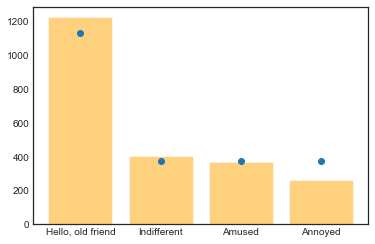

In [120]:
plt.bar(purple_link_counts["purple_link"],height=purple_link_counts["n"],color="orange",alpha=0.5)
plt.scatter(hypothesized["purple_link"],hypothesized["n"])
plt.show()

### 6. Visualizing counts

Two of the bars are close to the values we hypothesized and two are slightly different. We'll need to run a hypothesis test to see if the differences are statistically significant.

### 7. chi-square goodness of fit test

The one sample chi-square test is called a goodness of fit test. To run it, we use scipy-dot-stats and its chisquare method. There are two required arguments to chisquare: an array-like object for the observed counts, f_obs, and one for expected counts, f_exp. The observed counts are stored as n in purple_link_counts and the expected counts are stored similarly in the hypothesized DataFrame. The p-value is very small, much lower than the significance level we set, so we conclude that the sample distribution of proportions is different from the hypothesized distribution of proportions.

In [121]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts["n"],f_exp=hypothesized["n"])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

### 8. Let's practice!

Let's perform some chi-square goodness of fit tests.

## Visualizing goodness of fit

<p>The <em>chi-square goodness of fit test</em> compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.</p>
<p>Recall the vendor incoterms in the <code>late_shipments</code> dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.</p>
<ul>
<li><code>EXW</code>: 0.75</li>
<li><code>CIP</code>: 0.05</li>
<li><code>DDP</code>: 0.1</li>
<li><code>FCA</code>: 0.1</li>
</ul>
<p>These frequencies are stored in the <code>hypothesized</code> DataFrame.</p>
<p>The <code>incoterm_counts</code> DataFrame stores the <code>.value_counts()</code> of the <code>vendor_inco_term</code> column.</p>
<p><code>late_shipments</code> is available; <code>pandas</code> and <code>matplotlib.pyplot</code> are loaded with their standard aliases.</p>

In [122]:
incoterm_counts = late_shipments["vendor_inco_term"].value_counts().rename_axis("vendor_inco_term").reset_index(name="n")
incoterm_counts

,vendor_inco_term,n
0,EXW,732
1,FCA,111
2,DDP,100
3,CIP,56


In [123]:
hypothesized = pd.DataFrame({"vendor_inco_term" : incoterm_counts["vendor_inco_term"].values,
                             "prop":[0.75,0.1,0.1,0.05]})
hypothesized

,vendor_inco_term,prop
0,EXW,0.75
1,FCA,0.10
2,DDP,0.10
3,CIP,0.05


Find the number of rows in <code>late_shipments</code>.

In [124]:
n_total = len(late_shipments)
hypothesized["n"] = hypothesized["prop"] * n_total
hypothesized

,vendor_inco_term,prop,n
0,EXW,0.75,749.25
1,FCA,0.10,99.90
2,DDP,0.10,99.90
3,CIP,0.05,49.95


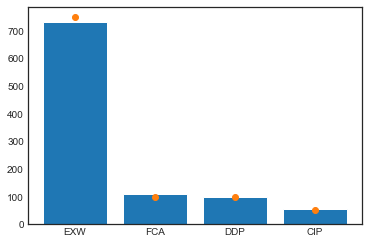

In [125]:
plt.bar(x="vendor_inco_term",height="n",data=incoterm_counts)
plt.scatter(data=hypothesized,x="vendor_inco_term",y="n")
plt.show()

In [126]:
hypothesized["n"]

0    749.25
1     99.90
2     99.90
3     49.95
Name: n, dtype: float64

In [127]:
chisquare(f_obs=incoterm_counts["n"],f_exp=hypothesized["n"])

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)

## Chi-square test of goodness of fit

<p>The bar plot of <code>vendor_inco_term</code> suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a <em>chi-square goodness of fit test</em> to see whether the differences are statistically significant.</p>
<p>Recall the hypotheses for this type of test:</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="2" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-texatom size="s" texclass="ORD"><mjx-mn class="mjx-n"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mn>0</mn></mrow></msub></math></mjx-assistive-mml></mjx-container>: The sample matches with the hypothesized distribution.</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="3" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i" noic="true"><mjx-c class="mjx-c1D43B TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.153em;"><mjx-texatom size="s" texclass="ORD"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D434 TEX-I"></mjx-c></mjx-mi></mjx-texatom></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>H</mi><mrow><mi>A</mi></mrow></msub></math></mjx-assistive-mml></mjx-container>: The sample does not match with the hypothesized distribution. </p>
<p>To decide which hypothesis to choose, we'll set a significance level of <code>0.1</code>.</p>
<p><code>late_shipments</code>, <code>incoterm_counts</code>, and <code>hypothesized</code> from the last exercise are available. <code>chisquare</code> from <code>scipy.stats</code> has been loaded.</p>

Using the <code>incoterm_counts</code> and <code>hypothesized</code> datasets, perform a chi-square goodness of fit test on <code>vendor_inco_term</code>.

# Time to Define the Relationship

## What do you assume?

### 1. What do you assume?

Each hypothesis test we've seen so far makes assumptions about the data. It's only when these assumptions are met that it is appropriate to use that hypothesis test.

### 2. Randomness

Whether it uses one or multiple samples, every hypothesis test assumes that each sample is randomly sourced from its population. If we don't have a random sample, then it won't be representative of the population. To check this assumption, we need to know where our data came from. There are no statistical or coding tests we can perform to check this. If in doubt, ask the people involved in data collection, or a domain expert that understands the population being sampled.

### 3. Independence of observations

Tests also assume that each observation is independent. There are some special cases like paired t-tests where dependencies between two samples are allowed, but these change the calculations, so we need to understand where such dependencies occur. As we saw with the paired t-test, not accounting for dependencies results in an increased chance of false negative and false positive errors. Not accounting for dependencies is a difficult problem to diagnose during analysis. Ideally, it needs to be discussed before data collection.

### 4. Large sample size

Hypothesis tests also assume that our sample is large enough that the Central Limit Theorem applies, and the sample distribution can be assumed to be normally distributed. Smaller samples incur greater uncertainty, which may mean that the Central Limit Theorem does not apply and the sampling distribution might not be normally distributed. The increased uncertainty of a small sample means we get wider confidence intervals on the parameter we are trying to estimate. If the Central Limit Theorem does not apply, the calculations on the sample, and any conclusions drawn from them, could be nonsense, which increases the chance of false negative and false positive errors. How big our sample needs to be to be "big enough" depends on the test.

### 5. Large sample size: t-test

For one sample t-tests, a popular heuristic is that we need at least thirty observations in our sample. For the two sample case or ANOVA, we need thirty observations from each group. That means we can't compensate for one minority group sample by making the majority group bigger. In the paired case, we need thirty pairs of observations. Sometimes we can get away with less than 30 in each of these tests; the important thing is that the null distribution appears normal. This is often the case at around 30 and that's the reason for this somewhat arbitrary threshold.

### 6. Large sample size: proportion tests

For one sample proportion tests, the sample is considered big enough if it contains at least ten successes and ten failures. Notice that if the probability of success is close to zero or close to one, then we need a bigger sample. In the two sample case, we require ten successes and ten failures from each sample.

### 7. Large sample size: chi-square tests

The chi-square test is slightly more forgiving and only requires five successes and five failures in each group, rather than ten.

### 8. Sanity check

One more check we can perform is to calculate a bootstrap distribution and visualize it with a histogram. If we don't see a bell-shaped normal curve, then one of the assumptions hasn't been met. In that case, we should revisit the data collection process, and see if any of the three assumptions of randomness, independence, and sample size do not hold.

### 9. Let's practice!

Time to check some assumptions!

## Testing sample size

<p>In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.</p>
<p>The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the <code>late_shipments</code> dataset.</p>
<p>Note that the <code>.all()</code> method from <code>pandas</code> can be used to check if all elements are true. For example, given a DataFrame <code>df</code> with numeric entries, you check to see if all its elements are less than <code>5</code>, using <code>(df &lt; 5).all()</code>.</p>
<p><code>late_shipments</code> is available, and <code>pandas</code> is loaded as <code>pd</code>.</p>

Get the count of each value in the <code>freight_cost_group</code> column of <code>late_shipments</code>.

Insert a suitable number to inspect whether the counts are "big enough" for a two sample t-test.

In [128]:
# Count the freight_cost_group values
counts = late_shipments["freight_cost_group"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     545
reasonable    454
Name: freight_cost_group, dtype: int64
True


Get the count of each value in the <code>late</code> column of <code>late_shipments</code>.

Insert a suitable number to inspect whether the counts are "big enough" for a one sample proportion test.

In [129]:
# Count the late values
counts = late_shipments["late"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     938
Yes     61
Name: late, dtype: int64
True


Get the count of each value in the <code>freight_cost_group</code> column of <code>late_shipments</code> grouped by <code>vendor_inco_term</code>.

Insert a suitable number to inspect whether the counts are "big enough" for a chi-square independence test.

In [130]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby("vendor_inco_term")["freight_cost_group"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_group
CIP               reasonable             34
                  expensive              22
DDP               expensive              55
                  reasonable             45
EXW               expensive             430
                  reasonable            302
FCA               reasonable             73
                  expensive              38
Name: freight_cost_group, dtype: int64
True


Get the count of each value in the <code>shipment_mode</code> column of <code>late_shipments</code>.

Insert a suitable number to inspect whether the counts are "big enough" for an ANOVA test.

In [131]:
# Count the shipment_mode values
counts = late_shipments["shipment_mode"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            905
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False



### Assumptions not met
So what do we do if the assumptions for the hypothesis tests we've seen so far aren't met?


### Parametric tests
The tests that we've seen so far are known as parametric tests. Tests like the z-test, t-test, and ANOVA are all based on the **assumption that the population is normally distributed.** Parametric tests also require **sample sizes that are "big enough"** that the Central Limit Theorem applies.


### Smaller Republican votes data
Let's study a case where the sample size requirement isn't met with a subset of the US Presidential voting results for Republican candidates that we examined in a previous chapter. Here, repub_votes_small contains only five counties randomly sampled from the larger dataset of 2008 and 2012 county-level returns.

In [132]:
repub_votes_small = repub_votes_potus_08_12.sample(5)
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff
14,Idaho,Gem,70.278092,70.907877,-0.629785
16,Illinois,Greene,52.574479,61.383849,-8.809370
76,Texas,Grayson,68.465378,73.197047,-4.731669
66,Pennsylvania,Clarion,60.439066,66.897319,-6.458253
91,West Virginia,Braxton,48.604178,56.723564,-8.119385



### Results with pingouin.ttest()
Let's try performing a paired t-test on this small sample. Recall that we require 30 pairs to feel confident in using a t-test, and this sample only contains five. We set a significance level of one percent and use the ttest method from pingouin to perform the left-tailed paired t-test. The small p-value indicates we should reject the null hypothesis, leading us to suspect that the 2008 election had a smaller percentage of Republican votes than the 2012 election.

In [133]:
alpha = 0.01
pingouin.ttest(x=repub_votes_small["repub_percent_08"],
               y=repub_votes_small["repub_percent_12"],
               paired=True,
               alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.933675,4,less,0.008525,"[-inf, -2.63]",0.695742,9.592,0.363124



### Non-parametric tests
In situations where we aren't sure about these assumptions, or we are certain that the assumptions aren't met, we can use non-parametric tests. They do not make the normal distribution assumptions or the sample size conditions that we saw in the previous video. There are many different ways to perform tests without these parametric assumptions. In this chapter, we'll focus on those relating to ranks. Consider the list, x. The first value of x, one, is the smallest value and the second value, fifteen, is the fifth smallest. These orderings from smallest to largest are known as the ranks of the elements of x. We can access them with the rankdata method from scipy-dot-stats.

In [134]:
x = [1,15,3,10,6]
from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])


### Non-parametric tests
Let's now use a non-parametric test to see what kind of results it gives. Remember that non-parametric tests work better than the parametric alternative in situations where the **sample size is small** or the **data cannot be assumed to be normally distributed**.


### Non-parametric tests
We will use the Wilcoxon-signed rank test, which was developed by Frank Wilcoxon in 1945 and was one of the first non-parametric procedures developed. We'll go over the inner workings of the test before implementing it using another pingouin method.


### Wilcoxon-signed rank test (Step 1)
The Wilcoxon-signed rank test requires us to calculate the absolute differences in the pairs of data and then rank them. First, we take the differences in the paired values.


In [135]:
repub_votes_small["diff"] = repub_votes_small["repub_percent_08"] - repub_votes_small["repub_percent_12"]
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff
14,Idaho,Gem,70.278092,70.907877,-0.629785
16,Illinois,Greene,52.574479,61.383849,-8.809370
76,Texas,Grayson,68.465378,73.197047,-4.731669
66,Pennsylvania,Clarion,60.439066,66.897319,-6.458253
91,West Virginia,Braxton,48.604178,56.723564,-8.119385


### Wilcoxon-signed rank test (Step 2)
Next, we take the absolute value of the differences, using the dot-abs method, and place them in the abs_diff column.


In [136]:
repub_votes_small["abs_diff"] = abs(repub_votes_small["diff"])
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff
14,Idaho,Gem,70.278092,70.907877,-0.629785,0.629785
16,Illinois,Greene,52.574479,61.383849,-8.809370,8.809370
76,Texas,Grayson,68.465378,73.197047,-4.731669,4.731669
66,Pennsylvania,Clarion,60.439066,66.897319,-6.458253,6.458253
91,West Virginia,Braxton,48.604178,56.723564,-8.119385,8.119385


### Wilcoxon-signed rank test (Step 3)
Then, we rank these absolute differences using the rankdata method from scipy-dot-stats.


In [137]:
repub_votes_small["renk_abs_diff"] = rankdata(repub_votes_small["abs_diff"])
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,renk_abs_diff
14,Idaho,Gem,70.278092,70.907877,-0.629785,0.629785,1.0
16,Illinois,Greene,52.574479,61.383849,-8.809370,8.809370,5.0
76,Texas,Grayson,68.465378,73.197047,-4.731669,4.731669,2.0
66,Pennsylvania,Clarion,60.439066,66.897319,-6.458253,6.458253,3.0
91,West Virginia,Braxton,48.604178,56.723564,-8.119385,8.119385,4.0


### Wilcoxon-signed rank test (Step 4)
The last part of our calculation involves calculating a test statistic called W. W uses the signs of the diff column to split the ranks into two groups: one for rows with negative differences and one for positive differences. T-minus is defined as the sum of the ranks with negative differences, and T-plus is the sum of the ranks with positive differences. For this example, all the differences are negative, so the T-minus value is the sum of the five ranks, and T-plus is zero. The test statistic W is the smaller of T-minus and T-plus, which in this case, is zero. We can calculate W, and its corresponding p-value, using a pingouin method instead of manual calculation.


In [138]:
repub_votes_small["sign"] = repub_votes_small["diff"].map(lambda x: "+" if (x>0) else "-" )
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,renk_abs_diff,sign
14,Idaho,Gem,70.278092,70.907877,-0.629785,0.629785,1.0,-
16,Illinois,Greene,52.574479,61.383849,-8.809370,8.809370,5.0,-
76,Texas,Grayson,68.465378,73.197047,-4.731669,4.731669,2.0,-
66,Pennsylvania,Clarion,60.439066,66.897319,-6.458253,6.458253,3.0,-
91,West Virginia,Braxton,48.604178,56.723564,-8.119385,8.119385,4.0,-


In [140]:
T_minus = repub_votes_small[repub_votes_small["sign"] == "-"]["renk_abs_diff"].sum()
T_plus = repub_votes_small[repub_votes_small["sign"] == "+"]["renk_abs_diff"].sum()
W = min(T_minus,T_plus)
W

0.0

### Implementation with pingouin.wilcoxon()
The dot-wilcoxon method from pingouin takes very similar arguments to the dot-ttest method, except it doesn't have a paired argument. The function returns a W value of zero - the same as our manual calculation! This corresponds to a p-value of around three percent, which is over ten times larger than the p-value from the t-test, so we should feel more confident with this result given the small sample size. The Wilcoxon test indicates that we do not have evidence that the 2008 Republican percentages are smaller than the 2012 percentages using this small sample of five rows.

In [141]:
pingouin.wilcoxon(x=repub_votes_small["repub_percent_08"],
                  y=repub_votes_small["repub_percent_12"],
                  alternative="less")


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.72


Fail to reject null hypothesis since  0.03125 > 0.01, which is contraction to the ttest .


## Wilcoxon signed-rank test

<p>You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.</p>
<p><code>sample_dem_data</code> is available, and has columns <code>dem_percent_12</code> and <code>dem_percent_16</code> in addition to <code>state</code> and <code>county</code> names. The following packages have also been loaded: <code>pingouin</code> and <code>pandas</code> as <code>pd</code>.</p>

In [142]:
sample_dem_data.shape


(500, 5)

Conduct a paired t-test on the percentage columns using an appropriate alternative hypothesis.

In [145]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data["dem_percent_12"],
                                     y=sample_dem_data["dem_percent_16"],
                                     paired=True,
                                     alternative="two-sided")




# Print paired t-test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


Conduct a Wilcoxon-signed rank test on the same columns.

In [144]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data["dem_percent_12"],
                                          y=sample_dem_data["dem_percent_16"],
                                          alternative = "two-sided")


# Print Wilcoxon test results
print(wilcoxon_test_results)

           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


 Given the large sample size (500), you obtained similar results here between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.

## Look ma! Still no parameters!

### 1. Look ma! Still no parameters!

In the previous video, we explored some non-parametric techniques and how they compare to their parametric counterparts. We'll continue on that theme here focusing on non-parametric alternatives to tests of independent numeric samples.

### 2. Wilcoxon-Mann-Whitney test

We can avoid assumptions about normally distributed data by performing hypothesis tests on the ranks of a numeric input. The Wilcoxon-Mann-Whitney test is, very roughly speaking, a t-test on ranked data. This test is similar to the Wilcoxon test we saw in the last video, **but works on unpaired data instead.**

### 3. Wilcoxon-Mann-Whitney test setup

Let's return to the StackOverflow survey and the relationship between converted compensation and the age respondents began coding. We start by focusing on just those two columns in a new DataFrame called age_vs_comp. To conduct a Wilcoxon-Mann-Whitney test with pingouin, **we first need to convert our data from long to wide format**. This is accomplished with the pivot method from pandas, which unlike pivot_table, does not aggregate; instead, it returns the raw values for each group across the rows. We now have our data in two columns named adult and child with the values corresponding to the converted_comp entries for each row. An adult value of NaN corresponds to a child entry and a child value of NaN corresponds to an adult entry.

In [146]:
age_vs_comp = stack_overflow[["converted_comp","age_first_code_cut"]]
age_vs_comp.head()

,converted_comp,age_first_code_cut
0,77556.0,adult
1,74970.0,child
2,594539.0,child
3,2000000.0,adult
4,37816.0,adult


In [147]:
age_vs_comp_wide = age_vs_comp.pivot(columns="age_first_code_cut",
                                     values='converted_comp')
age_vs_comp_wide.head()

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN


### 4. Wilcoxon-Mann-Whitney test

Let's set a significance level of one percent. We can run a Wilcoxon-Mann-Whitney test using mwu from pingouin. It accepts x and y arguments corresponding to the two columns of numbers we want to compare, in this case, child and adult. alternative sets the type of alternative hypothesis, in this case, that those who code first as children have a higher income than those who code first as adults, which is a right-tailed test. Here, the p-value is shown as around ten to the negative nineteenth power, which is significantly smaller than the significance level.

In [148]:
alpha = 0.01
pingouin.mwu(x=age_vs_comp_wide["child"],
             y=age_vs_comp_wide["adult"],
             alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


### 5. Kruskal-Wallis test

In the same way that ANOVA extends t-tests to more than two groups, the Kruskal-Wallis test extends the Wilcoxon-Mann-Whitney test to more than two groups. That is, the Kruskal-Wallis test is a non-parametric version of ANOVA. We use the kruskal method from pingouin to perform a Kruskal-Wallis test to investigate if there is a difference in converted_comp between job satisfaction groups. Unlike the Wilcoxon-Mann-Whitney test, we don't need to pivot our data here since the kruskal method works on long data. We pass in stack_overflow as data, the dependent variable, dv, as converted_comp, and we are comparing between the groups of job_sat. Again, the p-value here is very small and smaller than our significance level. This provides evidence that at least one of the mean compensation totals is different than the others across these five job satisfaction groups.

In [149]:
alpha = 0.01
pingouin.kruskal(data=stack_overflow,
                 dv="converted_comp",
                 between="job_sat")

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


### 6. Let's practice!

You're almost there! Head on over to the exercises to give these tests a go.

## Wilcoxon-Mann-Whitney

<p>Another class of non-parametric hypothesis tests are called <em>rank sum tests</em>. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.</p>
<p>By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.</p>
<p>One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.</p>
<p><code>late_shipments</code> is available, and the following packages have been loaded: <code>pingouin</code> and <code>pandas</code> as <code>pd</code>.</p>

Select <code>weight_kilograms</code> and <code>late</code> from <code>late_shipments</code>, assigning the name <code>weight_vs_late</code>.

Convert <code>weight_vs_late</code> from long-to-wide format, setting <code>columns</code> to <code>'late'</code>.

Run a Wilcoxon-Mann-Whitney test for a difference in <code>weight_kilograms</code> when the shipment was late and on-time.

In [150]:
# Choose the weight_kilograms and late columns
weight_vs_late = late_shipments[["late","weight_kilograms"]]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns="late",values="weight_kilograms")


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide["Yes"],
                        y=weight_vs_late_wide["No"],
                        alternative="two-sided")



# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  38087.0   two-sided  0.000014 -0.331294  0.665647


The small p-value here leads us to suspect that a difference does exist in the weight of the shipment and whether or not it was late. The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test

## Kruskal-Wallis

<p>Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.</p>
<p><code>late_shipments</code> is available, and the following packages have been loaded: <code>pingouin</code> and <code>pandas</code> as <code>pd</code>.</p>

Run a Kruskal-Wallis test on <code>weight_kilograms</code> between the different shipment modes in <code>late_shipments</code>.

In [151]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments,
                           dv="weight_kilograms",
                           between="shipment_mode")



# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  124.983244  7.248254e-28


The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.

## Congratulations!

### 1. Congratulations!

Well done! You've made it to the end of the course.

### 2. Course recap

To recap, in Chapter 1, we learned the workflow for testing proportions against a hypothesized value. We calculated the observed statistic, and a z-score, then transformed the z-score to get a p-value. We also learned about false negative and false positive errors. In Chapter 2, we learned how to test for differences in means between two groups using t-tests, and how to extend this to more than two groups using ANOVA and pairwise t-tests. In Chapter 3, we returned to proportion responses, and learned how to test for differences in proportions between two groups using proportion tests. We then extended it to more than two groups with chi-square independence tests, and returned to the one sample case with chi-square goodness of fit tests. In Chapter 4, we learned about the assumptions made by parametric hypothesis tests, and saw how non-parametric tests can be used when those assumptions aren't met.

### 3. More courses

Hypothesis testing is part of a branch of statistics known as inference. DataCamp has more courses that delve deeper into inference. The techniques used in this course are an example of frequentist statistics. A rival paradigm is known as Bayesian statistics, and naturally, DataCamp has a course that teaches it. This course began with an example of A/B testing, which is a common use case for hypothesis testing. You can learn more about A/B testing in this course.

### 4. Congratulations!

Congratulations for completing the course! I wish you the best of luck on your data journey!